# Persistent Train Data

<Axes: >

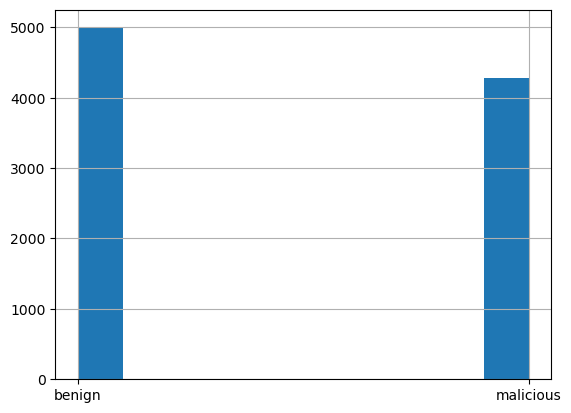

In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import numpy as np
from df_helpers import non_persistent_preprocessing, persistent_preprocessing

df_persistent_train = TabularDataset('Training.csv')

df_persistent_train.replace([np.inf, -np.inf], np.nan, inplace=True) 
df_persistent_train.dropna(inplace=True) 

df_persistent_train = df_persistent_train.sample(frac=1, random_state=29)

for attack_type in list(df_persistent_train['Label'].unique()):
    if attack_type == 'NormalTraffic':
        df_persistent_train.loc[df_persistent_train['Label'] == attack_type, ['Label']] = 'benign'
    else:
        df_persistent_train.loc[df_persistent_train['Label'] == attack_type, ['Label']] = 'malicious'

normal_df = df_persistent_train.loc[df_persistent_train['Label'] == 'benign'][:5000]
malicious_df = df_persistent_train.loc[df_persistent_train['Label'] == 'malicious']

df_persistent_train = pd.concat([normal_df, malicious_df])
df_persistent_train = persistent_preprocessing(df_persistent_train)

df_persistent_train['Label'].hist()

# Non-Persistent Train Data

Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv


<Axes: >

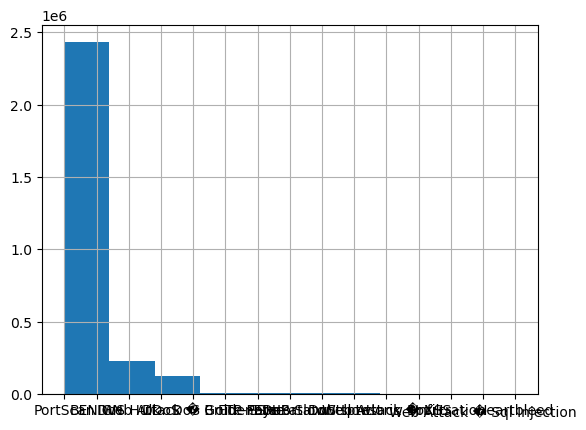

In [2]:
non_persistent_file_names = ['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', 
           'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
           'Friday-WorkingHours-Morning.pcap_ISCX.csv',
           'Monday-WorkingHours.pcap_ISCX.csv',
           'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
           'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
           'Tuesday-WorkingHours.pcap_ISCX.csv',
           'Wednesday-workingHours.pcap_ISCX.csv'
]

df_non_persistent = pd.DataFrame()

for file in non_persistent_file_names:
    print(file)
    df_temp = TabularDataset('non-persistent/'+file)
    df_temp.replace([np.inf, -np.inf], np.nan, inplace=True) 
    df_temp.dropna(inplace=True)
    df_non_persistent = pd.concat([df_temp, df_non_persistent])

df_non_persistent = non_persistent_preprocessing(df_non_persistent)

df_non_persistent['Label'].hist()


# Renaming threat data as either 'Malicious' or 'Benign'

<Axes: >

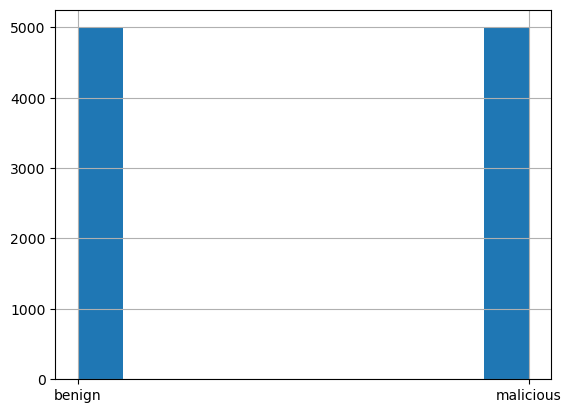

In [3]:
list(df_non_persistent['Label'].unique())

for attack_type in list(df_non_persistent['Label'].unique()):
    if attack_type == 'BENIGN':
        df_non_persistent.loc[df_non_persistent['Label'] == attack_type, ['Label']] = 'benign'
    else:
        df_non_persistent.loc[df_non_persistent['Label'] == attack_type, ['Label']] = 'malicious'


normal_non_persistent_df = df_non_persistent.loc[df_non_persistent['Label'] == 'benign'][:5000]
malicious_non_persistent_df = df_non_persistent.loc[df_non_persistent['Label'] == 'malicious'][:5000]

df_non_persistent_train = pd.concat([normal_non_persistent_df, malicious_non_persistent_df])

df_non_persistent_train['Label'].hist()

# Create combined train set

<Axes: >

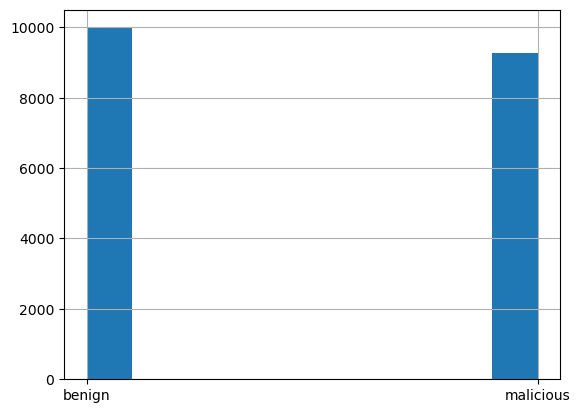

In [9]:
combined_training_df = pd.concat([df_persistent_train, df_non_persistent_train])

combined_training_df['Label'].hist()


# Persistent Test dataset

<Axes: >

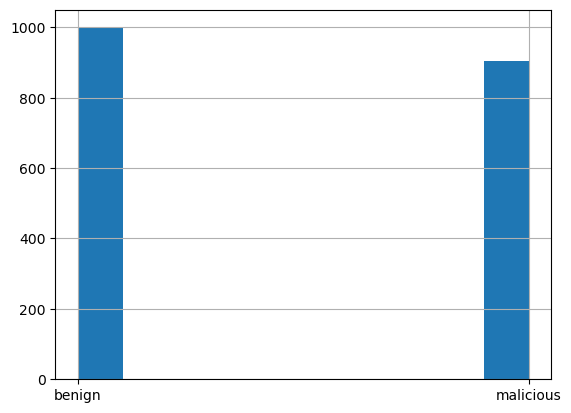

In [10]:
# test/train split
df_persistent_test = TabularDataset('Testing.csv')

df_persistent_test.replace([np.inf, -np.inf], np.nan, inplace=True) 
df_persistent_test.dropna(inplace=True) 

df_persistent_test = df_persistent_test.sample(frac=1, random_state=29)

for attack_type in list(df_persistent_test['Label'].unique()):
    if attack_type == 'NormalTraffic':
        df_persistent_test.loc[df_persistent_test['Label'] == attack_type, ['Label']] = 'benign'
    else:
        df_persistent_test.loc[df_persistent_test['Label'] == attack_type, ['Label']] = 'malicious'

normal_df = df_persistent_test.loc[df_persistent_test['Label'] == 'benign'][:1000]
malicious_df = df_persistent_test.loc[df_persistent_test['Label'] == 'malicious']

df_persistent_test = pd.concat([normal_df, malicious_df])

df_persistent_test = persistent_preprocessing(df_persistent_test)

df_persistent_test['Label'].hist()

# Non-Persistent Test Dataset

<Axes: >

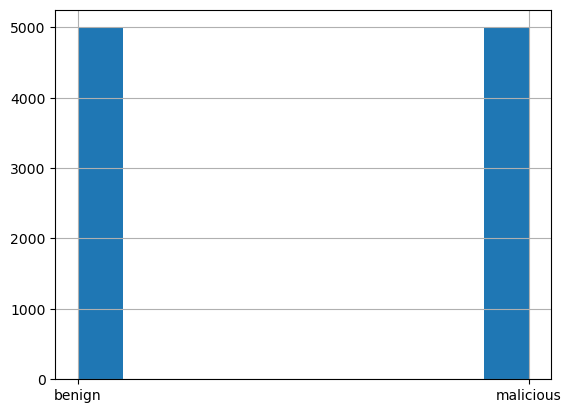

In [11]:
# Grab last 5000
normal_non_persistent_test = df_non_persistent.loc[df_non_persistent['Label'] == 'benign'][-5000:]
malicious_non_persistent_test = df_non_persistent.loc[df_non_persistent['Label'] == 'malicious'][-5000:]

non_persistent_test = pd.concat([normal_non_persistent_test, malicious_non_persistent_test])

non_persistent_test['Label'].hist()

# Combine persistent and non persistent testing sets

<Axes: >

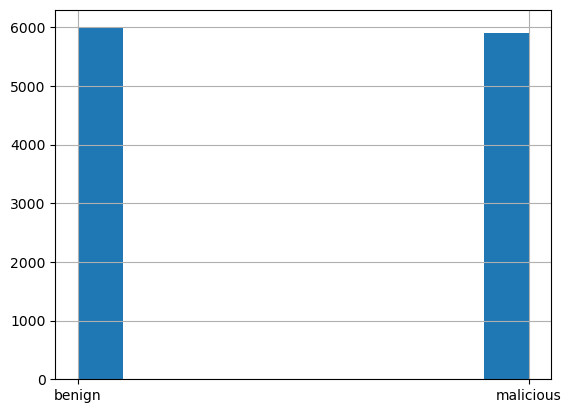

In [12]:
combined_testing_df = pd.concat([non_persistent_test, df_persistent_test])
combined_testing_df['Label'].hist()

# Train Model with Autogluon

In [13]:
predictor = TabularPredictor(label='Label', eval_metric='mcc').fit(combined_training_df, fit_weighted_ensemble = False, presets = 'medium')

No path specified. Models will be saved in: "AutogluonModels/ag-20250409_073932"
Preset alias specified: 'medium' maps to 'medium_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.8
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:22:58 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T8132
CPU Count:          10
Memory Avail:       2.77 GB / 16.00 GB (17.3%)
Disk Space Avail:   281.08 GB / 460.43 GB (61.0%)
Presets specified: ['medium']
Beginning AutoGluon training ...
AutoGluon will save models to "/Users/navya/Documents/Uni/Repos/autogluon/AutogluonModels/ag-20250409_073932"
Train Data Rows:    19283
Train Data Columns: 78
Label Column:       Label
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['benign', 'malicious']
	If 'binary' is not the correc

In [14]:
predictor.leaderboard(combined_testing_df)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.999496,1.000000,mcc,0.040560,0.011494,77.332262,0.040560,0.011494,77.332262,1,True,7
1,LightGBM,0.998489,1.000000,mcc,0.005972,0.001574,1.218718,0.005972,0.001574,1.218718,1,True,4
2,RandomForestGini,0.997146,0.998962,mcc,0.036782,0.027754,0.816099,0.036782,0.027754,0.816099,1,True,5
3,RandomForestEntr,0.996308,0.998962,mcc,0.034351,0.025228,0.700549,0.034351,0.025228,0.700549,1,True,6
4,ExtraTreesGini,0.995974,1.000000,mcc,0.046463,0.025845,0.363220,0.046463,0.025845,0.363220,1,True,8
5,LightGBMXT,0.995129,1.000000,mcc,0.007220,0.001570,1.264503,0.007220,0.001570,1.264503,1,True,3
6,ExtraTreesEntr,0.994970,1.000000,mcc,0.067364,0.027249,0.336763,0.067364,0.027249,0.336763,1,True,9
7,LightGBMLarge,0.971306,1.000000,mcc,0.003312,0.001342,3.094702,0.003312,0.001342,3.094702,1,True,13
8,XGBoost,0.967866,0.998962,mcc,0.024138,0.004116,0.852205,0.024138,0.004116,0.852205,1,True,11
9,NeuralNetFastAI,0.961116,1.000000,mcc,0.073987,0.015692,11.106461,0.073987,0.015692,11.106461,1,True,10


# Test Persistent

In [15]:
y_pred = predictor.predict(combined_testing_df.drop(columns=['Label']))
y_pred.head()

2821656    benign
2821657    benign
2821658    benign
2821659    benign
2821660    benign
Name: Label, dtype: object

In [18]:
predictor.evaluate(combined_testing_df, model='CatBoost')


{'mcc': 0.9994960209876775,
 'accuracy': 0.9997479626984793,
 'balanced_accuracy': 0.99975,
 'roc_auc': 0.9997777683663674,
 'f1': 0.9997459564738759,
 'precision': 0.9994920419911953,
 'recall': 1.0}

# Model Export Binary Benign/Malicious

In [19]:
save_path_clone_opt = "benign-malicious-classifier"
# will return the path to the cloned predictor, identical to save_path_clone_opt
path_clone_opt = predictor.clone_for_deployment(path=save_path_clone_opt, model='CatBoost')

Cloned TabularPredictor located in '/Users/navya/Documents/Uni/Repos/autogluon/AutogluonModels/ag-20250409_073932' to 'benign-malicious-classifier'.
	To load the cloned predictor: predictor_clone = TabularPredictor.load(path="benign-malicious-classifier")
Clone: Keeping minimum set of models required to predict with model 'CatBoost'...
Deleting model KNeighborsUnif. All files under /Users/navya/Documents/Uni/Repos/autogluon/benign-malicious-classifier/models/KNeighborsUnif will be removed.
Deleting model KNeighborsDist. All files under /Users/navya/Documents/Uni/Repos/autogluon/benign-malicious-classifier/models/KNeighborsDist will be removed.
Deleting model LightGBMXT. All files under /Users/navya/Documents/Uni/Repos/autogluon/benign-malicious-classifier/models/LightGBMXT will be removed.
Deleting model LightGBM. All files under /Users/navya/Documents/Uni/Repos/autogluon/benign-malicious-classifier/models/LightGBM will be removed.
Deleting model RandomForestGini. All files under /User